<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_9_(11_Feb)_Yelp_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

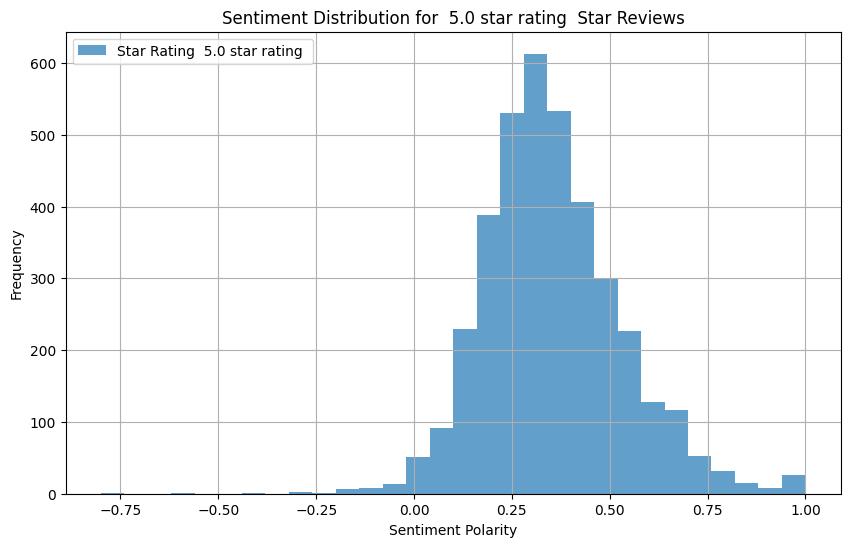

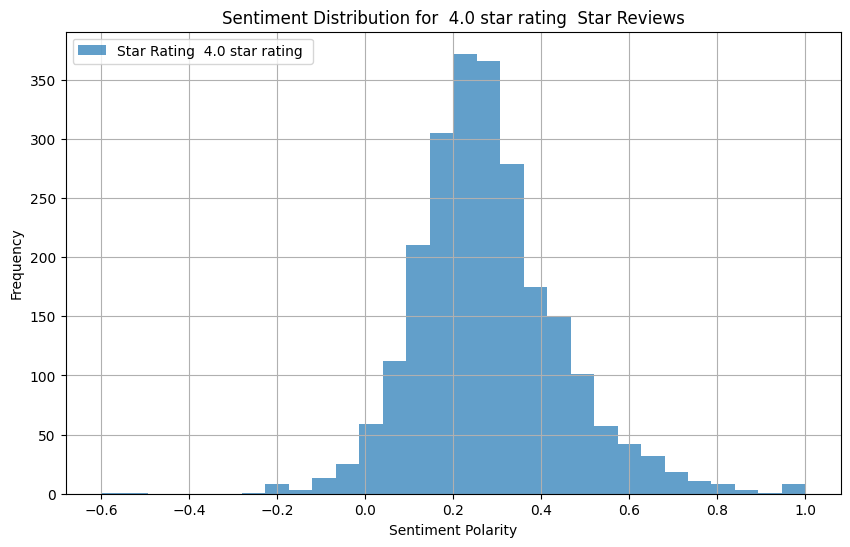

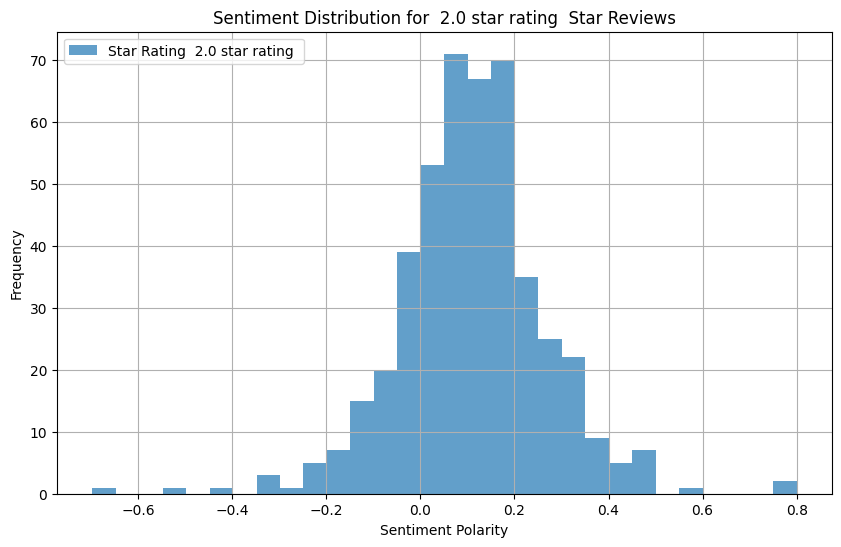

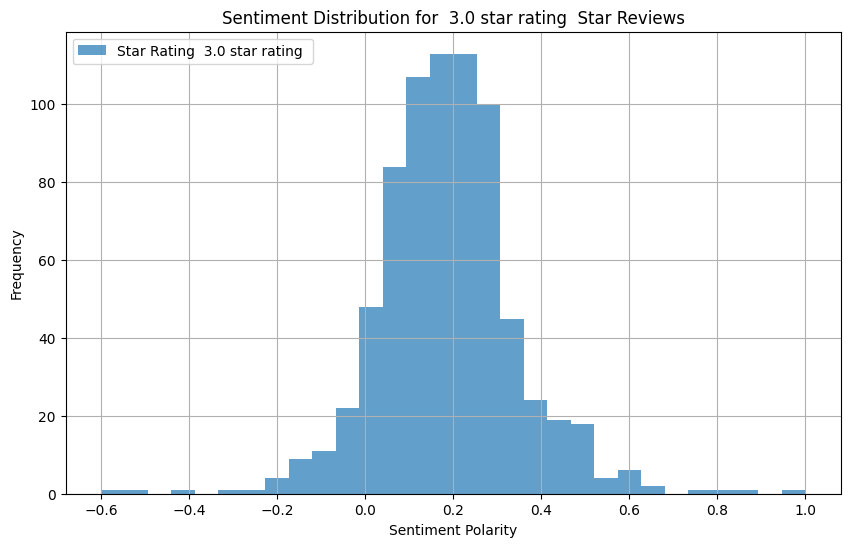

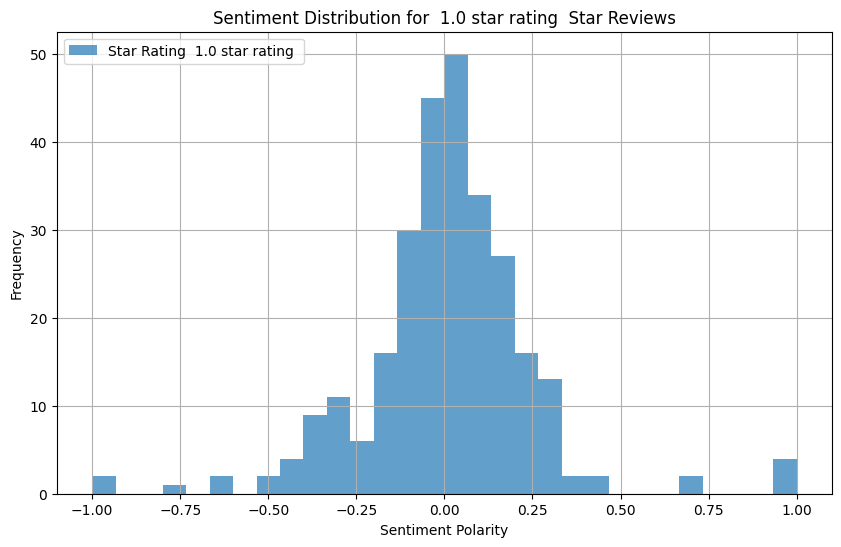

Average sentiment polarity for  5.0 star rating  star reviews: 0.35
Average sentiment polarity for  4.0 star rating  star reviews: 0.28
Average sentiment polarity for  2.0 star rating  star reviews: 0.11
Average sentiment polarity for  3.0 star rating  star reviews: 0.19
Average sentiment polarity for  1.0 star rating  star reviews: 0.01


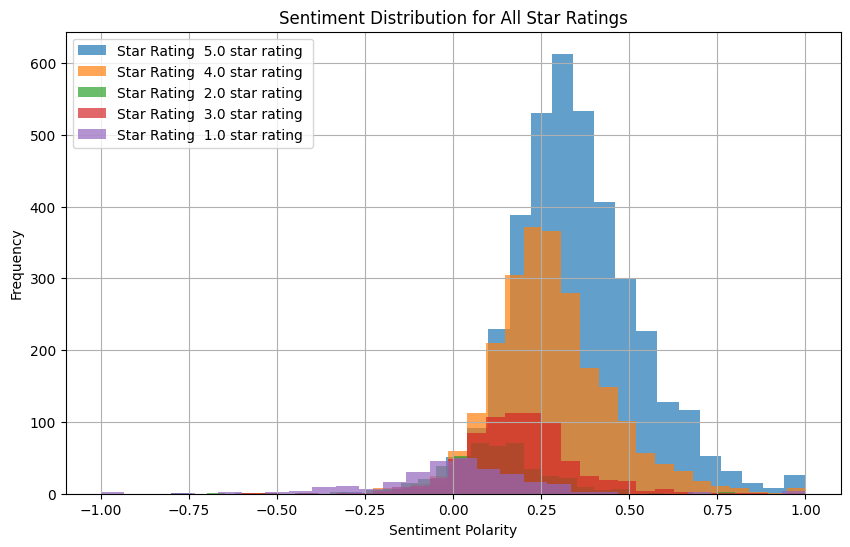

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('raw_yelp_review_data.xlsx')

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # -1 (negative) to 1 (positive)

# Apply sentiment analysis to the full review text
df['sentiment_polarity'] = df['full_review_text'].apply(get_sentiment)

# Create a dictionary to hold sentiment analysis for each star rating group
sentiment_by_rating = {}

# Group by star rating and analyze sentiment
for rating in df['star_rating'].unique():
    group = df[df['star_rating'] == rating]
    avg_sentiment = group['sentiment_polarity'].mean()
    sentiment_by_rating[rating] = avg_sentiment

    # Plot sentiment distribution for each star rating group
    plt.figure(figsize=(10,6))
    plt.hist(group['sentiment_polarity'], bins=30, alpha=0.7, label=f'Star Rating {rating}')
    plt.title(f'Sentiment Distribution for {rating} Star Reviews')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Print out the average sentiment polarity for each star rating group
for rating, sentiment in sentiment_by_rating.items():
    print(f"Average sentiment polarity for {rating} star reviews: {sentiment:.2f}")

# Optionally, you can visualize overall sentiment distribution
plt.figure(figsize=(10,6))
for rating in df['star_rating'].unique():
    group = df[df['star_rating'] == rating]
    plt.hist(group['sentiment_polarity'], bins=30, alpha=0.7, label=f'Star Rating {rating}')

plt.title('Sentiment Distribution for All Star Ratings')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already present
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Load the dataset
df = pd.read_excel('raw_yelp_review_data.xlsx')

# Preprocess and clean the text
def preprocess_text(text):
    # Remove punctuation, stopwords, and tokenize the text
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words and word.isalpha()])  # Remove stopwords and non-alphabetic words
    return text

# Apply text preprocessing
df['cleaned_review'] = df['full_review_text'].apply(preprocess_text)

# Function to extract topics using LDA
def extract_topics(reviews, num_topics=5):
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = vectorizer.fit_transform(reviews)

    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf)

    # Get the top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]  # Get top 10 words per topic
        topics.append(" ".join(top_words))
    return topics

# Extract topics for each star rating group
topics_by_rating = {}

for rating in df['star_rating'].unique():
    group = df[df['star_rating'] == rating]
    topics = extract_topics(group['cleaned_review'])
    topics_by_rating[rating] = topics

# Print out the major themes (topics) for each rating group
for rating, topics in topics_by_rating.items():
    print(f"Major Themes for {rating}-Star Reviews:")
    for i, topic in enumerate(topics):
        print(f"Topic {i+1}: {topic}")
    print("\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Major Themes for  5.0 star rating -Star Reviews:
Topic 1: gelato best venezia beautiful waffle nutella great cup amazing banana
Topic 2: coffee great place love good really like best friendly austin
Topic 3: breakfast moon coffee great love place gelato delicious migas food
Topic 4: cake gelato matcha birthday salmon vietnamese swings puff sara hazelnut
Topic 5: eggs italian benedict chicken scene gelato gas cooked true popping


Major Themes for  4.0 star rating -Star Reviews:
Topic 1: cream pancake puff puffs pacha pancakes strawberry dessert matcha blueberry
Topic 2: coffee place good great like really nice little pretty love
Topic 3: french panini good toast cortado belgian chill amazing coffee sausage
Topic 4: chicken tea boba milk fried toast basil curry place kale
Topic 5: lemon turns rojean aesthetic drop smores die flavorful soul downside


Major Themes for  2.0 star rating -Star Reviews:
Topic 1: bartender music yawning complaining repeatedly matcha hang forward bit average
T